In [1]:
%load_ext autoreload
%autoreload 2

In [56]:
import molmodmt as m3t
import numpy as np
import seaborn as sns
import nglview as nv
from simtk.unit import angstroms, nanometers
from scipy.spatial.qhull import Voronoi

# Alpha sphere

In [3]:
n_atoms = 4

In [4]:
coordinates = np.zeros([n_atoms,3],dtype='float64')*angstroms

In [5]:
m3t.get_form(coordinates)

'XYZ'

In [6]:
coordinates[0,:] = [1,3,5]*angstroms
coordinates[1,:] = [0,-2,1]*angstroms
coordinates[2,:] = [-1,-3,-2]*angstroms
coordinates[3,:] = [2,3,-1]*angstroms

In [7]:
coordinates.shape

(4, 3)

In [8]:
view = nv.NGLWidget()

for atom_index in range(n_atoms):
    atom_coordinates = coordinates[atom_index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

view

NGLWidget()

In [9]:
result = Voronoi(coordinates)

In [10]:
distances = m3t.distance(item_1=coordinates, item_2=result.vertices*angstroms)

In [11]:
print(distances)

[[[11.92598774]
  [11.92598774]
  [11.92598774]
  [11.92598774]]] A


In [12]:
r_sphere = distances[0,0,0]._value

In [13]:
view.shape.add_sphere(list(result.vertices[0]), [0.8,0.8,0.8], r_sphere)

## protein

In [57]:
molsys = m3t.load('1sux.pdb')

In [58]:
min_apol_neigh = 3 # Todavia no se lo que es

In [59]:
selection_heavy_atoms = m3t.select(molsys, 'protein and not type H')

In [60]:
coordinates = m3t.get(molsys, target='atom', selection=selection_heavy_atoms, coordinates=True)

In [61]:
result = Voronoi(coordinates[0,:,:])

In [62]:
voronoi_vertices = result.vertices*nanometers

In [63]:
pairs, distances = m3t.minimum_distance(item_1=molsys, selection_1=selection_heavy_atoms,
                                        item_2=voronoi_vertices, selection_2='all',
                                        as_entity_1=True, as_entity_2=False)

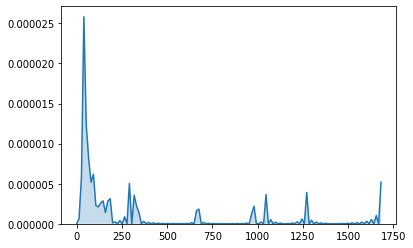

In [64]:
sns.kdeplot(distances[0], shade=True);

In [70]:
threshold= 1.2 * nanometers

In [71]:
np.sum(distances[0][:]<threshold)

24436

In [72]:
distances[0]

Quantity(value=array([  0.77379244,   0.47844584, 291.02795251, ...,   0.29546651,
         0.31438851,   0.31834376]), unit=nanometer)

In [45]:
len(distances[0][:])

25154

In [ ]:
view = m3t.view(molsys)
view.clear()
view.add_ball_and_stick(selection_heavy_atoms)

#for vertex_index in range(voro.vertices.shape[0]):
for vertex_index in range(100):
    vertex_coordinates = voro.vertices[vertex_index,:]
    view.shape.add_sphere(list(vertex_coordinates), [0,1,0], 0.5)

#view.shape.add_sphere([0,0,0], [1,0,0], 2)
view



In [ ]:
m3t.minimum_distance()